# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsabila Syahirah
- **Email:** octosalsyahirah@gmail.com
- **ID Dicoding:** hackersal

## Menentukan Pertanyaan Bisnis

- Bagaimana total penyewaan sepeda pada tahun 2011 vs 2012?
- Bagaimana persentase total penyewaan sepeda untuk kasual user dan registered user?
- Bagaimana trend penyewaan sepeda dari tahun 2011 ke 2012 berdasarkan kategori user?
- Bagaimana perbedaan perilaku kasual user dan registered user dalam menyewa sepeda berdasarkan hari dan jam?
- Pada musim dan di kondisi cuaca apa penyewaan sepeda terbanyak dan terdikit?

## Import Semua Packages/Library yang Digunakan

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

#### Load tabel day dari dataset

In [48]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load tabel hour dari dataset

In [49]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insights**
- Gathering data membuat kita lebih memahami isi data dan memastikan bahwa data terupload sesuai dengan sumber aslinya.

### Assessing Data

Dalam melakukan penilaian data, akan diidentifikasikan beberapa masalah umum yang ada pada data, yakni;
- Missing value
- Invalid value
- Duplicate data
- Inaccurate data
- Inconsistent data

#### Melakukan penilaian terhadap data day_df

**Memeriksa tipe data**

In [50]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Karena non-null value setiap kolom sama, tidak perlu melakukan identifikasi missing value.

**Memeriksa duplikat data**

In [51]:
print(day_df.duplicated().sum())

0


**Memeriksa ringkasan parameter statistik dari kolom numerik tabel**

In [52]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data day_df tidak memiliki duplicate, missing value, invalid value, dan inaccurate/inconsistent value. Namun, data type dteday object tidak sesuai, karena seharusnya memiliki data type date.
- Kolom weekday menggunakan pengisian zero-based indexing dengan range 0-6, yang tidak masalah, namun akan membingungkan bagi orang awam yang membaca data.
- Kolom weathersit hanya ada pada rentang 1-3. Rentang 4 dengan kondisi Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog berarti tidak pernah terjadi dalam dua tahun tersebut.

#### Melakukan penilaian terhadap data hour_df

**Memeriksa tipe data**

In [53]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Karena non-null value setiap kolom sama, tidak perlu melakukan identifikasi missing value.

**Memeriksa duplikat data**

In [54]:
print(hour_df.duplicated().sum())

0


**Memeriksa ringkasan parameter statistik dari kolom numerik tabel**

In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data hour_df tidak memiliki duplicate, missing value, invalid value, dan inaccurate/inconsistent value. Namun, data type dteday object tidak sesuai, karena seharusnya memiliki data type date.
- Kolom weekday menggunakan pengisian zero-based indexing dengan range 0-6, yang tidak masalah, namun akan membingungkan bagi orang awam yang membaca data.

### Cleaning Data

Sesuai dengan identifikasi masalah data pada tahap wrangling, akan dilakukan;
- Penggantian data type untuk kolom dteday pada setiap tabel.
- Mengubah nama kolom dan format pada data untuk meningkatkan readabilitas data.

#### Membersihkan data tabel day_df

**Mengganti tipe data**
- Mengganti tipe data dteday ke datetime

In [56]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Mengganti nama kolom**
- Mengganti nama kolom tabel menjadi lebih deskriptif

In [57]:
day_df = day_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'holiday' : 'isholiday',
    'workingday' : 'isworkingday',
    'temp' : 'temperature',
    'atemp' : 'apparent_temperature',
    'hum' : 'hummidity',
    'casual' : 'casual_users',
    'registered' : 'registered_users',
    'cnt' : 'user_counts'
})
day_df.head(3)

,instant,date,season,year,month,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


**Mengubah format pada data kolom weekday**
- Dalam kalender 1 Januari 2011 jatuh pada hari sabtu, dan di Indonesia, representasi hari pertama dalam setiap minggu adalah hari senin dengan nilai 1. Sehingga kita format datanya dengan representasi senin-minggu = 1-7

In [58]:
day_df['weekday'] = day_df['weekday'].replace({
    0:7,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6
})
day_df.head(5)

,instant,date,season,year,month,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,7,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengubah format data kolom season**
- Mengganti data kolom season dengan format 1:springer, 2:summer, 3:fall, 4:winter.

In [59]:
day_df['season'] = day_df['season'].replace({1: 'Springer', 2 : 'Summer', 
                                             3 : 'Fall', 4 : 'Winter'})
day_df.head(5)

,instant,date,season,year,month,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,7,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengubah format data kolom year**
- Mengubah data kolom year dengan format 0: 2011 dan 1: 2012.

In [60]:
day_df['year'] = day_df['year'].replace({
    0 : 2011,
    1 : 2012
})
day_df.head(5)

,instant,date,season,year,month,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,7,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengubah format data kolom weathersit**
- Mengubah kolom weather sit dengan format 1: 'Clear/Cloudy', 2 : 'Misty/Foggy', 3 : 'Light snow/rain', 4 : 'Heavy snow/rain' yang dipersingkat.
- Dalam dataset karakteristik yang diberikan oleh dataset, deskripsinya lebih panjang, yakni: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- sehingga harus disingkat namun tetap merepresentasikan secara lengkap.

In [61]:
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear/Cloudy', 
                                               2 : 'Misty/Foggy', 3 : 'Light snow/rain', 
                                               4 : 'Heavy snow/rain'})
day_df.head(5)

,instant,date,season,year,month,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,2011,1,0,6,0,Misty/Foggy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,7,0,Misty/Foggy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,Clear/Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,Clear/Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,Clear/Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan data tabel hour_df

**Mengganti tipe data**
- Mengganti tipe data dteday dari object ke datetime.

In [62]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Mengganti nama kolom**
- Mengganti nama kolom tabel menjadi lebih deskriptif

In [63]:
hour_df = hour_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'holiday' : 'isholiday',
    'workingday' : 'isworkingday',
    'temp' : 'temperature',
    'atemp' : 'apparent_temperature',
    'hum' : 'hummidity',
    'casual' : 'casual_users',
    'registered' : 'registered_users',
    'cnt' : 'user_counts'
})
hour_df.head(3)

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


**Mengganti format data kolom season**
- Mengganti data kolom season dengan format 1:springer, 2:summer, 3:fall, 4:winter.

In [64]:
hour_df['season'] = hour_df['season'].replace({1: 'Springer', 2 : 'Summer', 
                                             3 : 'Fall', 4 : 'Winter'})
hour_df.head(5)

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengganti format data kolom year**
- Mengubah data kolom year dengan format 0: 2011 dan 1: 2012.

In [65]:
hour_df['year'] = hour_df['year'].replace({0: 2011, 1 : 2012})

hour_df.head(5)

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengganti format data kolom weekday**
- Dalam kalender 1 Januari 2011 jatuh pada hari sabtu, dan di Indonesia, representasi hari pertama dalam setiap minggu adalah hari senin dengan nilai 1. Sehingga kita format datanya dengan representasi senin-minggu = 1-7.

In [66]:
hour_df['weekday'] = hour_df['weekday'].replace({
    0:7,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6
})
hour_df.head(5)

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengganti format kolom weathersit**
- Mengubah kolom weathersit dengan format 1: 'Clear/Cloudy', 2 : 'Misty/Foggy', 3 : 'Light snow/rain', 4 : 'Heavy snow/rain' yang dipersingkat.
- Dalam dataset karakteristik yang diberikan oleh dataset, deskripsinya lebih panjang, yakni: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- sehingga harus disingkat namun tetap merepresentasikan secara lengkap.

In [67]:
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear/Cloudy', 
                                               2 : 'Misty/Foggy', 3 : 'Light snow/rain', 
                                               4 : 'Heavy snow/rain'})
hour_df.head(5)

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
0,1,2011-01-01,Springer,2011,1,0,0,6,0,Clear/Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,Clear/Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,Clear/Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,Clear/Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,Clear/Cloudy,0.24,0.2879,0.75,0.0,0,1,1


#### Menggabungkan data hour dan day untuk pembuata streamlit.

In [68]:
merged_df = pd.merge(hour_df, day_df[['date', 'weathersit']], on='date', how='left')

# Step 3: Save the merged DataFrame to a new CSV file
merged_df.to_csv('dashboard\\data.csv', index=False)

merged_df.head(10)

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit_x,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts,weathersit_y
0,1,2011-01-01,Springer,2011,1,0,0,6,0,Clear/Cloudy,0.24,0.2879,0.81,0.0000,3,13,16,Misty/Foggy
1,2,2011-01-01,Springer,2011,1,1,0,6,0,Clear/Cloudy,0.22,0.2727,0.80,0.0000,8,32,40,Misty/Foggy
2,3,2011-01-01,Springer,2011,1,2,0,6,0,Clear/Cloudy,0.22,0.2727,0.80,0.0000,5,27,32,Misty/Foggy
3,4,2011-01-01,Springer,2011,1,3,0,6,0,Clear/Cloudy,0.24,0.2879,0.75,0.0000,3,10,13,Misty/Foggy
4,5,2011-01-01,Springer,2011,1,4,0,6,0,Clear/Cloudy,0.24,0.2879,0.75,0.0000,0,1,1,Misty/Foggy
5,6,2011-01-01,Springer,2011,1,5,0,6,0,Misty/Foggy,0.24,0.2576,0.75,0.0896,0,1,1,Misty/Foggy
6,7,2011-01-01,Springer,2011,1,6,0,6,0,Clear/Cloudy,0.22,0.2727,0.80,0.0000,2,0,2,Misty/Foggy
7,8,2011-01-01,Springer,2011,1,7,0,6,0,Clear/Cloudy,0.20,0.2576,0.86,0.0000,1,2,3,Misty/Foggy
8,9,2011-01-01,Springer,2011,1,8,0,6,0,Clear/Cloudy,0.24,0.2879,0.75,0.0000,1,7,8,Misty/Foggy
9,10,2011-01-01,Springer,2011,1,9,0,6,0,Clear/Cloudy,0.32,0.3485,0.76,0.0000,8,6,14,Misty/Foggy


#### Pindahkan file bersih ke file .csv baru untuk memudahkan proses pembuatan dashboard

In [101]:
day_df.to_csv('dashboard\\day_df.csv', index=False)
hour_df.to_csv('dashboard\\hour_df.csv', index=False)

**Insights**
- Cleaning data membuat data lebih mudah dibaca, dikalkulasikan, menghindari kesalahan interpretasi data, dan agar analisi yang akan dilakukan menjadi lebih kuat.
- Melakukan pemformatan ulang data membuat data lebih akurat untuk diinterpretasikan. Contohnya pada kolom weekday, season, dan temperature.

## Exploratory Data Analysis (EDA)

### Explore Data Tabel day_df

In [69]:
day_df.describe(include="all")

,instant,date,season,year,month,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,Clear/Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,0.028728,4.002736,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,1.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,0.000000,2.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,0.000000,4.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,0.000000,6.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,1.000000,7.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Sepanjang tahun 2011 - 2012, kodisi cuaca clear/cloudy yang paling mendominasi dengan frekuensi 463 hari.
- Rata-rata casual user per hari adalah sekitar 23% dari rata-rata registered user per harinya.

### Explore Data Tabel hour_df

In [70]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,Clear/Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,0.028770,4.011451,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,0.000000,2.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,0.000000,4.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,0.000000,6.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,1.000000,7.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Sepanjang tahun 2011 - 2012, kodisi cuaca clear/cloudy yang paling mendominasi dengan frekuensi 11413 jam.
- Rata-rata casual user per jam adalah sekitar 23% dari rata-rata registered user per jamnya.

**Menunjukkan data dari tabel day_df dan hour_df konsisten**

### Explore lanjutan data day_df

#### Total penyewaan sepeda berdasarkan hari

In [71]:
day_df.groupby(['weekday'
                ]).agg({'casual_users' : 'sum', 
                        'registered_users' : 'sum', 
                        'user_counts' : 'sum'
                }).sort_values(by=[
                               'user_counts'], 
                               ascending=False)

,casual_users,registered_users,user_counts
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
7,140521,303506,444027


Hari minggu menjadi hari dengan total penyewaan sepeda paling sedikit dan hari jumat menjadi yang paling banyak. Namun, dapat dilihat bahwa total casual user lebih banyak melakukan penyewaan sepeda di akhir pekan daripada di hari kerja.

#### Total penyewaan sepeda berdasarkan bulan

In [72]:
day_df.groupby(['month'
                ]).agg({'casual_users' : 'sum', 
                        'registered_users' : 'sum', 
                        'user_counts' : 'sum'
                }).sort_values(by=[
                               'user_counts'], 
                               ascending=False)

,casual_users,registered_users,user_counts
month,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


Penyewaan sepeda tertinggi ada pada bulan Augustus dan top 5 penyewaan tertinggi ada di Q2-Q3.

#### Total penyewaan berdasarkan hari kerja atau tidak

In [73]:
day_df.groupby(['year', 'isworkingday'
               ]).agg({'casual_users' : 'sum', 
                       'registered_users' : 'sum', 
                       'user_counts' : 'sum'})

casual_users  registered_users  user_counts
year isworkingday                                             
2011 0                   128898            257941       386839
     1                   118354            737910       856264
2012 0                   187834            425596       613430
     1                   184931           1251215      1436146

Total penyewaan sepeda setiap tahunnya lebih banyak di hari kerja (workingday = 0). Namun, jika dilihat secara detail. Untuk user casual, total penyewaan di bukan hari kerja sedikit lebih banyak, kebalikan dari registered user yang total penyewaan sepedan pada hari kerja 3 kali lipat lebih banyak daripada bukan hari kerja.

#### Total penyewaan berdasarkan hari libur atau tidak

In [74]:
day_df.groupby(['year', 'isholiday']).agg({'casual_users' : 'sum', 
                             'registered_users' : 'sum', 
                              'user_counts' : 'sum'})

casual_users  registered_users  user_counts
year isholiday                                             
2011 0                237504            975577      1213081
     1                  9748             20274        30022
2012 0                360154           1641009      2001163
     1                 12611             35802        48413

Total penyewaan sepeda terbanyak ada pada bukan hari libur.

#### Penyewaan sepeda berdasarkan tahun

In [75]:
day_df.groupby(['year']).agg({'casual_users' : 'sum', 
                             'registered_users' : 'sum', 
                              'user_counts' : 'sum'})

,casual_users,registered_users,user_counts
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Terjadi peningkatan penyewaan sepeda hampir dua kali lipat dari tahun 2011 ke tahun 2012.

#### Penyewaan sepeda berdasarkan bulan pertahun

In [76]:
day_df.groupby(by=['year', 'month']).agg({'casual_users' : 'sum', 
                             'registered_users' : 'sum', 
                              'user_counts' : 'sum'
                            }).sort_values(by=['year','user_counts'], ascending=False)

casual_users  registered_users  user_counts
year month                                             
2012 9             43778            174795       218573
     8             43197            171306       214503
     7             41705            161902       203607
     6             43294            159536       202830
     10            34538            164303       198841
     5             44235            151630       195865
     4             38456            135768       174224
     3             31618            133257       164875
     11            21009            131655       152664
     12            13245            110468       123713
     2              8721             94416       103137
     1              8969             87775        96744
2011 6             30612            112900       143512
     7             36452            104889       141341
     8             28842            107849       136691
     5             31050            104771       135821
     9             26545            100873       127418
     10            25222             98289       123511
     11            15594             86573       102167
     4             22346             72524        94870
     12             8448             78875        87323
     3             12826             51219        64045
     2              6242             41973        48215
     1              3073             35116        38189

- Setiap tahun, Q3 (bulan Juli-September) selalu masuk top 5 total penyewaan. Sedangkan Q1 selalu konsisten masuk lowest 5 total penyewaasn (user_counts).
- Ada beberapa bulan yang bergantian menempati urutan, namun tidak pernah melewati rentang urutan tertentu. Contohnya bulan 1, 2, 3, 4, 11, dan 12 selalu berada di urutan <6. Sedangkan bulan 5, 6, 7, 8, 9, dan 10 selalu berada dalam rentang >6.

#### Penyewaan sepeda berdasarkan Musim/season per tahun

In [77]:
day_df.groupby(by=['year', 'season']).agg({'casual_users' : 'sum', 
                             'registered_users' : 'sum', 
                              'user_counts' : 'sum'
                            }).sort_values(by=
                                           ['year','user_counts'],
                                            ascending=False)

casual_users  registered_users  user_counts
year season                                               
2012 Fall            130641            510838       641479
     Summer          125958            445315       571273
     Winter           76969            438507       515476
     Springer         39197            282151       321348
2011 Fall             95450            324200       419650
     Summer           77564            269752       347316
     Winter           52813            273324       326137
     Springer         21425            128575       150000

Urutan penyewaan sepeda terbanyak konsisten dari tahun 2011 ke 2012. Dari terbanyak, secara berurutan dimulai dari fall, summer, winter, ke springer. Ini berlaku untuk dua jenis user beserta total user.

#### Penyewaan sepeda berdasarkan kondisi cuaca/weathersit

In [78]:
day_df.groupby(by=['year', 'weathersit']).agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'user_counts': 'sum'
}).sort_values(by=['year', 'user_counts'], ascending=False)

casual_users  registered_users  user_counts
year weathersit                                                  
2012 Clear/Cloudy           269074           1153811      1422885
     Misty/Foggy            101789            512145       613934
     Light snow/rain          1902             10855        12757
2011 Clear/Cloudy           177272            657795       835067
     Misty/Foggy             67987            314937       382924
     Light snow/rain          1993             23119        25112

- Dalam step gathering data, sudah ditemukan bahwa rentang maksimal weathersit adalah 3. Jadi, kondisi cuaca Heavy snow/rain tidak pernah terjadi di tahun 2011 dan 2012 dalam dataset. 
- Ditemukan bahwa urutan penyewaan sepeda selalu konsisten berdasarkan kondisi cuaca. Dengan cuaca clear/cloudy memiliki total penyewaan paling banyak dan light snow/rain memiliki total penyewaan paling sedikit.
- Dari tahun 2011 ke 2012, setiap jenis user dalam setiap jenis kondisi cuaca terjadi kenaikan, kecuali tahun 2011 lightsnow/rain terjadi penurunan yang signifikan di tahun 2012.

**Insight**
Penyewaan sepeda:
- Total penyewaan sepeda paling banyak adalah hari Jumat, sedangkan Minggu paling sedikit.
- Casual users lebih banyak menyewa sepeda di akhir pekan, sedangkan registered users lebih banyak menyewa pada hari kerja.
- Urutan penyewaan sepeda terbanyak konsisten dari 2011 ke 2012: Fall > Summer > Winter > Spring, berlaku untuk kedua jenis pengguna.
- Penyewaan sepeda paling banyak terjadi pada kondisi cuaca clear/cloudy, paling sedikit saat light snow/rain.

Tren bulanan dan tahunan:
- Bulan Agustus memiliki penyewaan tertinggi, dan Q2-Q3 selalu masuk dalam 5 besar penyewaan tertinggi.
- Total penyewaan sepeda lebih banyak pada hari kerja (workingday = 0), tetapi casual users cenderung lebih banyak menyewa sepeda pada akhir pekan.
- Ada peningkatan signifikan penyewaan sepeda dari 2011 ke 2012.
- Setiap tahun, Q3 (Juli-September) selalu masuk 5 besar, sementara Q1 selalu berada di 5 terbawah.

Hal lain yang ditemukan
- Kondisi cuaca "Heavy snow/rain" tidak pernah terjadi pada tahun 2011 dan 2012 dalam dataset.
- Penyewaan sepeda meningkat untuk semua jenis pengguna pada setiap kondisi cuaca, kecuali untuk light snow/rain yang menunjukkan penurunan signifikan pada tahun 2012.

### Explore lanjutan data hour_df

#### Total penyewaan sepeda berdasarkan jam

In [79]:
hour_df.groupby(['hour'
                ]).agg({'casual_users' : 'sum', 
                        'registered_users' : 'sum', 
                        'user_counts' : 'sum'
                }).sort_values(by=[ 
                               'user_counts'], 
                               ascending=False
                            )

,casual_users,registered_users,user_counts
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Peak-hour penyewaan sepeda ada pada jam 17, 18, dan 8.

#### Total penyewaan sepeda berdasarkan jam setiap tahun dan hari kerja atau tidak
**Top 5 jam dengan total penyewaan sepeda terbanyak berdasarkan tahun dan hari kerja atau tidak.**

In [80]:
isworking_df = hour_df.groupby(['year', 'isworkingday', 'hour'
                ]).agg({'casual_users' : 'sum', 
                        'registered_users' : 'sum', 
                        'user_counts' : 'sum'
                }).sort_values(by=['year', 
                               'isworkingday', 
                               'user_counts'], 
                               ascending=[True, True, False
                               ])
isworking_df.groupby(by=['year', 'isworkingday']).head(5)

casual_users  registered_users  user_counts
year isworkingday hour                                             
2011 0            13           12613             20254        32867
                  12           11553             20733        32286
                  14           12785             19492        32277
                  15           12507             19562        32069
                  16           11966             19902        31868
     1            17           11017             87712        98729
                  18            9960             81536        91496
                  8             5015             81662        86677
                  19            8144             56357        64501
                  16            8773             44981        53754
2012 0            13           18901             34333        53234
                  12           17610             34710        52320
                  14           19461             32495        51956
                  15           19025             31792        50817
                  16           17744             31868        49612
     1            17           17374            146017       163391
                  18           15165            138468       153633
                  8             6028            143890       149918
                  19           12285             96718       109003
                  16           15351             77163        92514

Top 5 jam di bukan hari kerja adalah jam 13, 12, 14, 15, dan 16. Sedangkan top 5 jam di hari kerja adalah 17, 18, 8, 19, 16.

**List jam dengan total penyewaan sepeda paling sedikit berdasarkan hari kerja atau bukan.**

In [81]:
isworking_df.groupby(by=['year', 'isworkingday']).tail(5)

casual_users  registered_users  user_counts
year isworkingday hour                                             
2011 0            7              866              2824         3690
                  3              721              1720         2441
                  6              385              1198         1583
                  5              168               593          761
                  4              227               516          743
     1            5              260              4136         4396
                  1              864              2512         3376
                  2              507              1289         1796
                  4              204               870         1074
                  3              233               767         1000
2012 0            7             1122              5215         6337
                  3              744              2666         3410
                  6              490              2219         2709
                  5              215               953         1168
                  4              287               846         1133
     1            5              369              7567         7936
                  1              969              3832         4801
                  2              534              1899         2433
                  4              156              1322         1478
                  3              195              1128         1323

Di hari bukan kerja, jam dengan total penyewaan sepeda paling sedikit adalah jam 7, 3, 6, 5, 4. Sedangkan di hari kerja, adalah jam 5, 1, 2, 3, 4. Berlaku untuk tahun 2011 dan 2012.

#### Total penyewaan sepeda berdasarkan jam di setiap tahun dan di hari libur atau tidak
**Top 5 jam dengan total penyewaan sepeda terbanyak berdasarkan tahun dan hari libur atau tidak.**

In [82]:
isholiday_df = hour_df.groupby(['year', 'isholiday', 'hour'
                ]).agg({'casual_users' : 'sum', 
                        'registered_users' : 'sum', 
                        'user_counts' : 'sum'
                }).sort_values(by=['year', 
                               'isholiday', 
                               'user_counts'], 
                               ascending=[True, True, False
                               ])
isholiday_df.groupby(by=['year', 'isholiday']).head(5)

casual_users  registered_users  user_counts
year isholiday hour                                             
2011 0         17           20795            104561       125356
               18           17515             97466       114981
               8             6770             87444        94214
               19           14075             70006        84081
               16           19947             63398        83345
     1         13             961              1493         2454
               14             964              1431         2395
               12             939              1454         2393
               16             792              1485         2277
               17             678              1598         2276
2012 0         17           31844            173504       205348
               18           25719            163428       189147
               8             8495            154711       163206
               16           32059            106626       138685
               19           20402            117649       138051
     1         17             903              2977         3880
               13            1245              2570         3815
               18             711              2929         3640
               12            1147              2490         3637
               14            1224              2393         3617

Hampir sama dengan perbandingan di hari kerja atau bukan. Di setiap tahun, di bukan hari libur, jam dengan total penyewaan paling banyak adalah jam 17, 18, 8, 16, 19. Di hari libur, jam dengan total penyewaan paling banyak pada tahun 2011 adalah jam 13, 14, 12, 16, 17 dan pada tahun 2012 adalah jam 17, 13, 18, 12, 14.

**List jam dengan total penyewaan sepeda paling sedikit berdasarkan hari kerja atau bukan.**

In [83]:
isholiday_df.groupby(by=['year', 'isholiday']).tail(5)

casual_users  registered_users  user_counts
year isholiday hour                                             
2011 0         1             1963              7212         9175
               2             1484              4941         6425
               5              418              4656         5074
               3              922              2427         3349
               4              413              1353         1766
     1         2               86               150          236
               6               30               173          203
               3               32                60           92
               5               10                73           83
               4               18                33           51
2012 0         1             2555             11617        14172
               2             1763              7629         9392
               5              561              8403         8964
               3              912              3704         4616
               4              425              2120         2545
     1         6               44               347          391
               2               79               220          299
               5               23               117          140
               3               27                90          117
               4               18                48           66

Pada hari libur, total penyewaan sepeda paling sedikit ada di antara jam 22-6. Sedangkan bukan hari libur jam 1-5.

#### Total penyewaan sepeda berdasarkan jam di setiap tahun

In [84]:
hour_df.groupby(by=['year', 'hour']).agg(
    {'casual_users' : 'sum', 
     'registered_users' : 'sum', 
     'user_counts' : 'sum'
}).sort_values(by=['year', 'user_counts'], ascending=False)

casual_users  registered_users  user_counts
year hour                                             
2012 17           32747            176481       209228
     18           26430            166357       192787
     8             8792            156742       165534
     16           33095            109031       142126
     19           20980            120007       140987
     13           32561             83019       115580
     12           30712             84504       115216
     15           33743             80816       114559
     14           33992             75178       109170
     20           15418             86314       101732
     9            13594             86358        99952
     7             4269             92972        97241
     11           26704             68018        94722
     10           20724             58022        78746
     21           11725             64845        76570
     22            9169             48766        57935
     23            6072             32753        38825
     6             1640             32691        34331
     0             3952             19638        23590
     1             2638             11968        14606
     2             1842              7849         9691
     5              584              8520         9104
     3              939              3794         4733
     4              443              2168         2611
2011 17           21473            106159       127632
     18           18066             98919       116985
     8             6969             88498        95467
     19           14525             71277        85802
     16           20739             64883        85622
     13           20152             49187        69339
     12           19006             50192        69198
     15           20863             47727        68590
     14           21097             45385        66482
     20           10960             51858        62818
     9             8864             50622        59486
     7             3768             53162        56930
     11           16582             40016        56598
     21            8845             40030        48875
     10           13065             34446        47511
     22            7031             30646        37677
     23            4993             20123        25116
     6             1377             19424        20801
     0             3423             12117        15540
     1             2071              7487         9558
     2             1570              5091         6661
     5              428              4729         5157
     3              954              2487         3441
     4              431              1386         1817

Seacara keseluruhan dalam tahun 2011 dan 212, sewa sepeda terjadi paling banyak pada jam 17, 18, dan 8, sedangkan paling sedikit pada jam 5, 3, dan 4.

#### Total penyewaan sepeda berdasarkan jam di tiap musim dan tahun
**Mencari top 3 total user berdasarkan jam di tiap musim dan tahun.**

In [85]:
seasonhour_df = hour_df.groupby(by=['year', 'season', 'hour'
    ]).agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'user_counts': 'sum'
}).sort_values(by=['year', 'season', 'user_counts'], ascending=False)

seasonhour_df.groupby(['year', 'season']).head(3)

casual_users  registered_users  user_counts
year season   hour                                             
2012 Winter   17            6785             45972        52757
              18            4403             41442        45845
              8             1840             42122        43962
     Summer   17           11380             47723        59103
              18            9738             45626        55364
              8             2747             41249        43996
     Springer 17            3451             28877        32328
              18            2534             27451        29985
              8              893             28051        28944
     Fall     17           11131             53909        65040
              18            9755             51838        61593
              8             3312             45320        48632
2011 Winter   17            4445             28848        33293
              18            3485             26098        29583
              8             1381             24414        25795
     Summer   17            6988             29377        36365
              18            5996             27544        33540
              8             2220             23729        25949
     Springer 17            1926             13526        15452
              8              586             12565        13151
              18            1159             11966        13125
     Fall     17            8114             34408        42522
              18            7426             33311        40737
              19            6642             24444        31086

Di tiap season di tiap tahun, jam 17, 18, dan 8 mendominasi total penyewaan sepeda.

**Mencari lowest 3 total user berdasarkan jam di tiap musim dan tahun.**

In [86]:
seasonhour_df.groupby(['year', 'season']).tail(3)

casual_users  registered_users  user_counts
year season   hour                                             
2012 Winter   2              387              2028         2415
              3              208               937         1145
              4              118               632          750
     Summer   5              145              2009         2154
              3              306               916         1222
              4              103               510          613
     Springer 5               40              1345         1385
              3               86               651          737
              4               48               288          336
     Fall     5              286              2782         3068
              3              339              1290         1629
              4              174               738          912
2011 Winter   5               64              1415         1479
              3              205               702          907
              4              106               423          529
     Summer   5              132              1222         1354
              3              261               601          862
              4              152               353          505
     Springer 5               25               420          445
              3               80               291          371
              4               25               129          154
     Fall     5              207              1672         1879
              3              408               893         1301
              4              148               481          629

Di tiap season di tiap tahun, jam 3, 4, dan 5 mendominasi total penyewaan sepeda paling sedikit. Namun, pada winter 2012 ada sedikit perbedaan, yakni jam 2, 3, 4 yang memiliki total penyewaan sepeda paling sedikit.

#### Total penyewaan sepeda berdasarkan jam di tiap kondisi cuaca dan tahun
**Mencari top 3 total user berdasarkan jam di tiap kondisi cuaca dan tahun.**

In [87]:
weatherhour_df = hour_df.groupby(by=['year', 'weathersit', 'hour'
    ]).agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'user_counts': 'sum'
}).sort_values(by=['year', 'weathersit', 'user_counts'], ascending=[True, True, False])

weatherhour_df.groupby(['year', 'weathersit']).head(3)

casual_users  registered_users  user_counts
year weathersit      hour                                             
2011 Clear/Cloudy    17           16227             77398        93625
                     18           14161             73278        87439
                     19           11334             52695        64029
     Heavy snow/rain 16               1                35           36
     Light snow/rain 17            1519              8499        10018
                     18             849              6859         7708
                     8              329              6045         6374
     Misty/Foggy     8             2190             30380        32570
                     17            3727             20262        23989
                     18            3056             18782        21838
2012 Clear/Cloudy    17           25090            135003       160093
                     18           20055            121726       141781
                     16           25333             82001       107334
     Heavy snow/rain 18               6               158          164
                     1                1                22           23
     Light snow/rain 18            1054              9940        10994
                     17            1465              9492        10957
                     16            1363              6139         7502
     Misty/Foggy     8             2809             54225        57034
                     18            5315             34533        39848
                     17            6192             31986        38178

Ditemukan jam dengan kondisi cuaca heavy snow/rain dimana di data day_df tidak terdaftar hari dengan kondisi ini.

**Mencari the lowest 3 total user berdasarkan jam di tiap kondisi cuaca dan tahun.**

In [88]:
weatherhour_df.groupby(['year', 'weathersit']).tail(3)

casual_users  registered_users  user_counts
year weathersit      hour                                             
2011 Clear/Cloudy    5              316              3276         3592
                     3              697              1737         2434
                     4              306              1000         1306
     Heavy snow/rain 16               1                35           36
     Light snow/rain 5               13               261          274
                     3               48               167          215
                     4               32               105          137
     Misty/Foggy     5               99              1192         1291
                     3              209               583          792
                     4               93               281          374
2012 Clear/Cloudy    5              406              5454         5860
                     3              608              2416         3024
                     4              276              1349         1625
     Heavy snow/rain 18               6               158          164
                     1                1                22           23
     Light snow/rain 5               28               378          406
                     3               27               133          160
                     4               35                95          130
     Misty/Foggy     5              150              2688         2838
                     3              304              1245         1549
                     4              132               724          856

Jam terjadinya penyewaan sepeda di kondisi heavy snow/rain tidak berubah.

#### Mencari kapan terjadinya kondisi cuaca heavy snow/rain

In [89]:
hour_df[hour_df['weathersit'] == 'Heavy snow/rain']

,instant,date,season,year,month,hour,isholiday,weekday,isworkingday,weathersit,temperature,apparent_temperature,hummidity,windspeed,casual_users,registered_users,user_counts
585,586,2011-01-26,Springer,2011,1,16,0,3,1,Heavy snow/rain,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,Springer,2012,1,18,0,1,1,Heavy snow/rain,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,Springer,2012,1,1,0,6,0,Heavy snow/rain,0.14,0.1364,0.86,0.1940,1,22,23


Kondisi cuaca heavy snow/rain hanya terjadi di 26 Januari 2011 dan 9 dan 21 Januari 2012 saja. Jadi, analisis top and lowest 3 total penyewaan sepeda berdasarkan jam tidak valid.

**Insight**
Peak Hour Penyewaan:
- Jam 17, 18, dan 8 adalah waktu dengan penyewaan terbanyak.
- Hari kerja: 17, 18, 8, 19, 16.
- Bukan hari kerja: 13, 12, 14, 15, 16.

Jam dengan Penyewaan Terendah:
- Hari kerja: 5, 1, 2, 3, 4.
- Bukan hari kerja: 7, 3, 6, 5, 4.
  
Hari Libur vs. Bukan Libur:
- Bukan hari libur: 17, 18, 8, 16, 19 (terbanyak), 1-5 (terendah).
- Tahun 2011 (hari libur): 13, 14, 12, 16, 17; 2012 (hari libur): 17, 13, 18, 12, 14.
- Penyewaan paling sedikit: 22-6 (hari libur), 1-5 (bukan libur).

Seasonal trends:
- Penyewaan paling sedikit: jam 3, 4, dan 5 di semua season.
- Winter 2012: jam 2, 3, dan 4 paling sedikit.

Hal lain yang ditemukan
- Ada data jam dengan kondisi heavy snow/rain di 2011-2012, namun hanya terjadi pada 26 Januari 2011 dan 9, 21 Januari 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana total jumlah penyewaan sepeda tahun 2011 vs 2012?

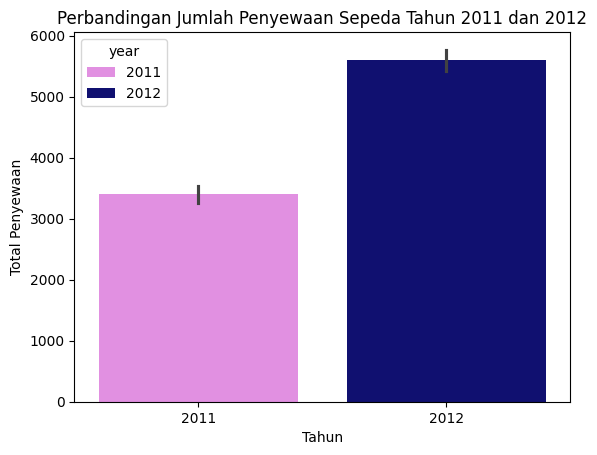

In [90]:
sns.barplot(x='year', y='user_counts', data=day_df, hue='year', palette=['violet', 'navy'])

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Jumlah Penyewaan Sepeda Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')

# Menampilkan plot
plt.show()

Berdasarkan grafik di atas, penyewaan sepeda terjadi peningkatan dari tahun 2011 ke tahun 2012.

### Pertanyaan 2: Bagaimana persentase total penyewaan sepeda untuk kasual user dan registered user?

#### Persentase total penyewaan sepeda masing-masing user tahun 2011.

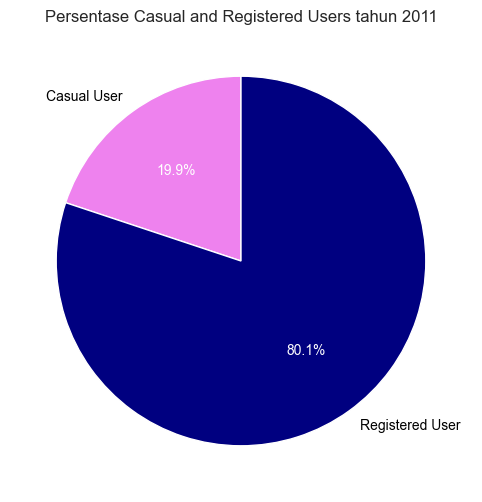

In [785]:
year_2011 = day_df[day_df['year'] == 2011]

casual_users2011 = year_2011["casual_users"].sum()
registered_users2011 = year_2011["registered_users"].sum()

pie_data = [
    {"user_type": "Casual User", "user_count": casual_users2011},
    {"user_type": "Registered User", "user_count": registered_users2011},
]

# Approach 2: Creating a DataFrame
user_types = ["Casual User", "Registered User"]
user_counts = [casual_users2011, registered_users2011]
df_pie = pd.DataFrame(list(zip(user_types, user_counts)), columns=["user_type", "user_count"])

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
patches, texts, autotexts = plt.pie(df_pie["user_count"], labels=df_pie["user_type"], autopct="%1.1f%%", startangle=90, colors=['violet', 'navy'])
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('white')
plt.title("Persentase Casual and Registered Users tahun 2011")
plt.show()

#### Persentase total penyewaan sepeda masing-masing user tahun 2011.

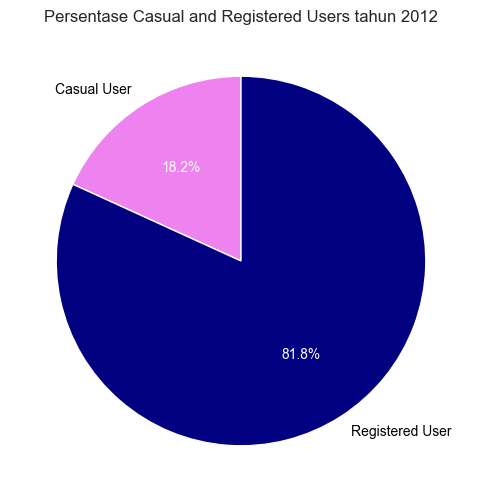

In [786]:
year_2012 = day_df[day_df['year'] == 2012]

casual_users2012 = year_2012["casual_users"].sum()
registered_users2012 = year_2012["registered_users"].sum()

pie_data = [
    {"user_type": "Casual User", "user_count": casual_users2012},
    {"user_type": "Registered User", "user_count": registered_users2012},
]

user_types = ["Casual User", "Registered User"]
user_counts = [casual_users2012, registered_users2012]
df_pie = pd.DataFrame(list(zip(user_types, user_counts)), columns=["user_type", "user_count"])

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
patches, texts, autotexts = plt.pie(df_pie["user_count"], labels=df_pie["user_type"], autopct="%1.1f%%", startangle=90, colors=['violet', 'navy'])
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('white')
plt.title("Persentase Casual and Registered Users tahun 2012")
plt.show()

#### Persentase total penyewaan sepeda masing-masing user secara keseluruhan.

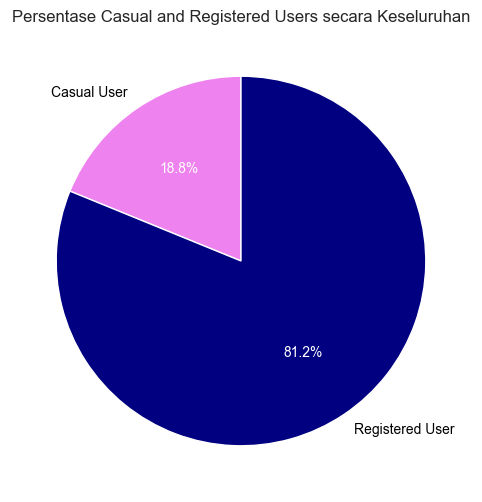

In [787]:
total_casual_users = day_df["casual_users"].sum()
total_registered_users = day_df["registered_users"].sum()

pie_data = [
    {"user_type": "Casual User", "user_count": total_casual_users},
    {"user_type": "Registered User", "user_count": total_registered_users},
]

# Approach 2: Creating a DataFrame
user_types = ["Casual User", "Registered User"]
user_counts = [total_casual_users, total_registered_users]
df_pie = pd.DataFrame(list(zip(user_types, user_counts)), columns=["user_type", "user_count"])

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
patches, texts, autotexts = plt.pie(df_pie["user_count"], labels=df_pie["user_type"], autopct="%1.1f%%", startangle=90, colors=['violet', 'navy'])
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('white')
plt.title("Persentase Casual and Registered Users secara Keseluruhan")
plt.show()


Pada tahun 2011 80,1% dari total pengguna adalah pengguna terdaftar, sedangkan sisanya 19,9% adalah pengguna kasual. Pada tahun 2012, 81,2% dari total pengguna adalah pengguna terdaftar, sedangkan sisanya 18,8% adalah pengguna kasual. Terjadi penurunan persentase penyewaan sepeda oleh kasual user sebanyak 1.7%. Secara keseluruhan, sebagian besar pengguna, yaitu 81,2%, adalah pengguna terdaftar, sedangkan sisanya 18,8% merupakan pengguna kasual.

### Pertanyaan 3: Bagaimana trend penyewaan sepeda dari tahun 2011 dan 2012 setiap bulannya berdasarkan kategori user?

### Time Series Analysis

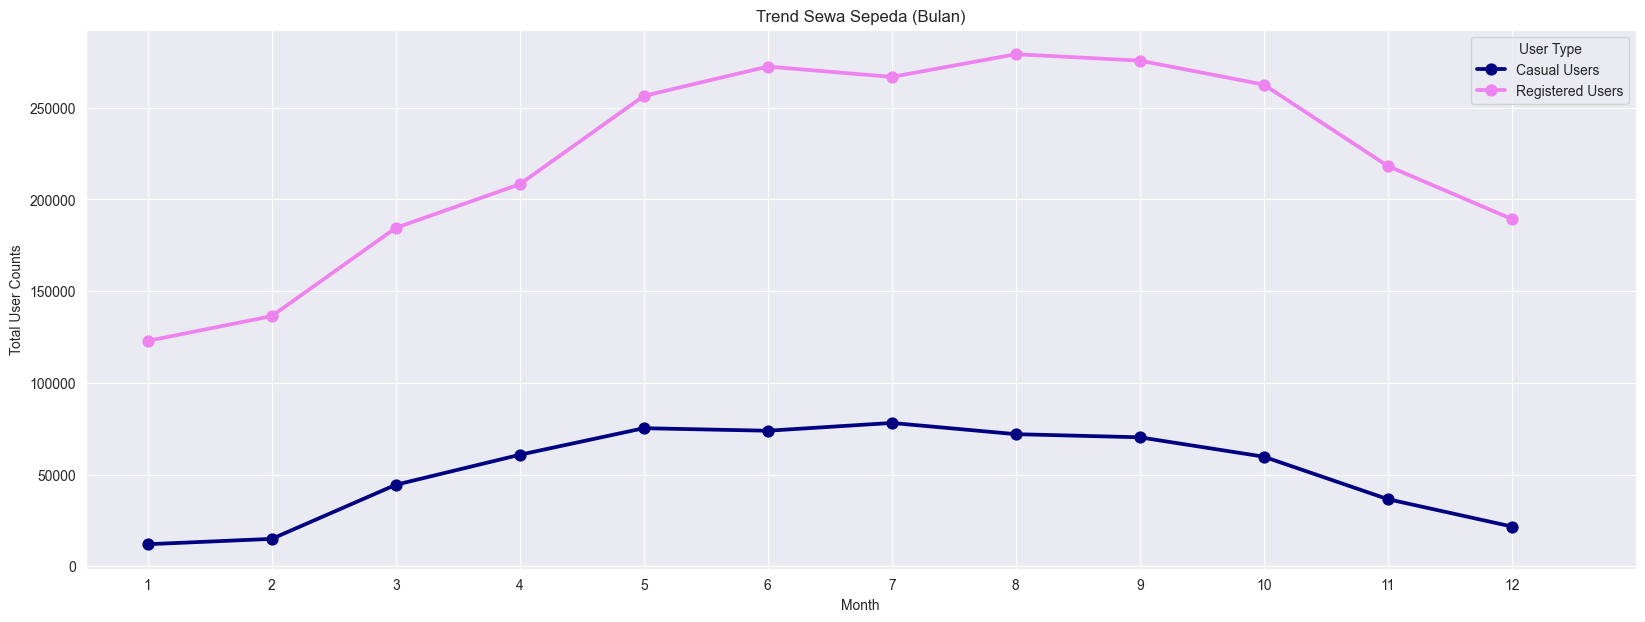

In [788]:
mtrend_df = day_df.groupby('month')[['casual_users', 'registered_users']].sum().reset_index()

plt.figure(figsize=(20, 7))
sns.pointplot(x='month', y='casual_users', data=mtrend_df, label='Casual Users', marker='o', color='navy')
sns.pointplot(x='month', y='registered_users', data=mtrend_df, label='Registered Users', marker='o', color='violet')

plt.title('Trend Sewa Sepeda (Bulan)')
plt.xlabel('Month')
plt.ylabel('Total User Counts')
plt.legend(title='User Type')
plt.xticks(np.arange(0, 13, 1))
plt.grid(True)
plt.show()

Berdasarkan grafik di atas, kedua jenis user (kasual user dan registered user) terdapat pola musiman yang jelas pada jumlah penyewaan sepeda. Jumlah penyewaan cenderung meningkat pada Q2-Q3 dan menurun pada Q1-Q4.

### Pertanyaan 4 : Bagaimana perbedaan perilaku kasual user dan registered user dalam menyewa sepeda berdasarkan hari dan jam?

### Manual Grouping

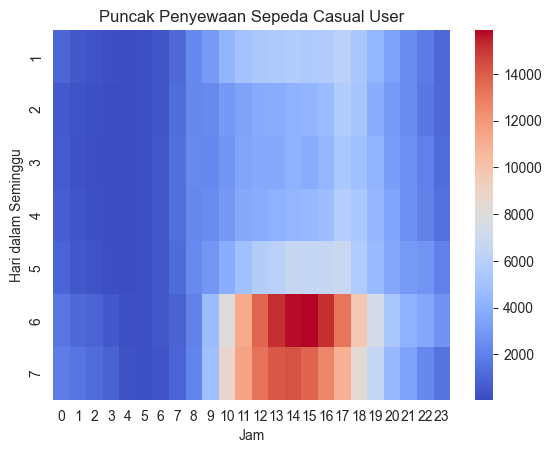

In [789]:
hourly_counts = hour_df.groupby(['weekday', 'hour'])['casual_users'].sum().unstack()

# Membuat heatmap
sns.heatmap(hourly_counts, cmap='coolwarm')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Seminggu')
plt.title('Puncak Penyewaan Sepeda Casual User')
plt.show()

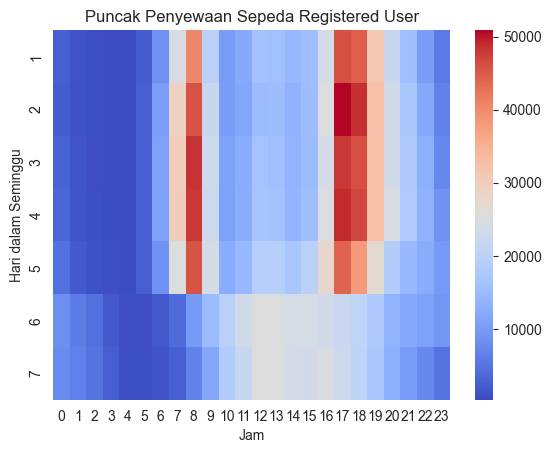

In [790]:
hourly_counts = hour_df.groupby(['weekday', 'hour'])['registered_users'].sum().unstack()

# Membuat heatmap
sns.heatmap(hourly_counts, cmap='coolwarm')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Seminggu')
plt.title('Puncak Penyewaan Sepeda Registered User')
plt.show()

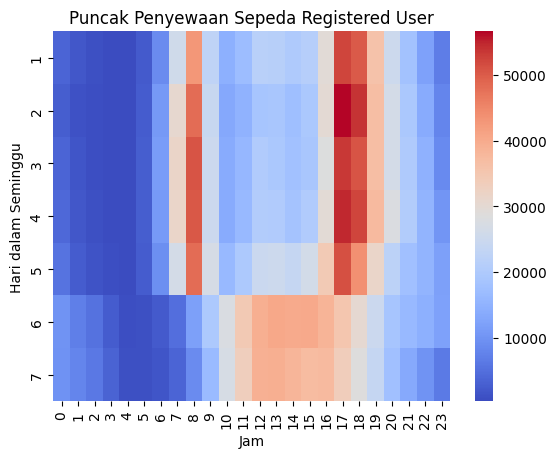

In [94]:
hourly_counts = hour_df.groupby(['weekday', 'hour'])['user_counts'].sum().unstack()

sns.heatmap(hourly_counts, cmap='coolwarm')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Seminggu')
plt.title('Puncak Penyewaan Sepeda Keseluruhan User')
plt.show()

Berdasarkan grafik di atas;
- Kasual user paling banyak menyewa sepeda di akhir pekan antara jam 10 hingga 18.
- Registered user paling banyak menyewa sepeda di hari kerja di jam 8 dan jam 17 hingga 19.

### Pertanyaan 5: Pada musim dan di kondisi cuaca apa penyewaan sepeda terbanyak dan terdikit?

### Manual Grouping

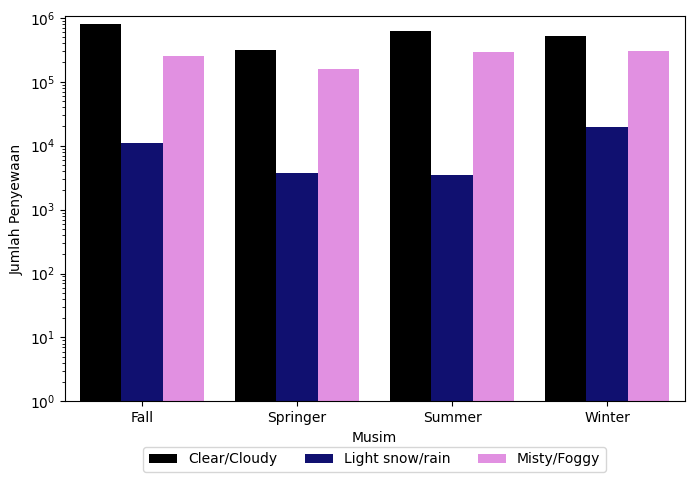

In [117]:
rental_counts = day_df.groupby(['season', 'weathersit'
                               ]).agg({
    'user_counts': 'sum'})

max_value = rental_counts['user_counts'].max()

    # Tentukan batas atas sumbu y dengan memberikan ruang tambahan
y_max = max_value * 1.2  # Sesuaikan faktor pengali sesuai kebutuhan

    # Buat grafik batang
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='user_counts', hue='weathersit', data=rental_counts, palette=['black', 'navy', 'violet'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3, fontsize=10)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Jumlah Penyewaan', fontsize=10)
plt.xticks(fontsize=10)

    # Atur skala sumbu y menjadi logaritmik
plt.yscale('log')
plt.ylim(bottom=1)  # Pastikan sumbu y dimulai dari 1 pada skala log

plt.yticks(fontsize=10)
plt.show()

Berdasarkan grafik di atas, total penyewaan sepeda terbanyak ada di musim fall dengan kondisi cuaca clear/cloudy. Sedangkan total penyewaan sepeda paling dikit ada di musim summer dengan cuaca light snow/rain.

## Conclusion

- Penyewaan sepeda mengalami peningkatan dari tahun 2011 ke tahun 2012
- Jumlah penyewaan sepeda untuk registered user lebih tinggi dan stabil, sementara casual user mengalami fluktuasi signifikan, dengan kedua jenis user menunjukkan pola musiman meningkat di Q2-Q3 dan menurun di Q1-Q4.
- Pada tahun 2012, sebagian besar user adalah registered user (81,2%), dengan penurunan persentase casual user sebesar 1,7% dibandingkan tahun 2011.
- Penyewaan sepeda paling banyak oleh casual user adalah akhir pekan dengan rentang jam 10-18, sedangkan registered user adalah hari kerja dengan rentang jam 8 dan 17-18.
- Total penyewaan sepeda terbanya ada di musim fall dengan kondisi cuaca clear/cloud, sedangkan paling sedikit adalah musim summer dengan cuaca light snow/rain.